CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [3]:
from model import *
from utils import *

CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-7., 7.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)

CODE BLOCK: 5

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

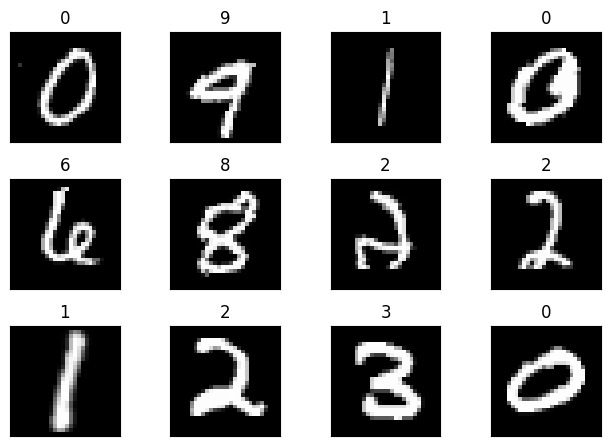

In [7]:
plot_data(train_loader)

CODE BLOCK: 7

CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [9]:
model = Net().to(device)
summary(model, input_size= (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
           Dropout-3           [-1, 16, 26, 26]               0
            Conv2d-4           [-1, 32, 24, 24]           4,640
       BatchNorm2d-5           [-1, 32, 24, 24]              64
           Dropout-6           [-1, 32, 24, 24]               0
            Conv2d-7            [-1, 8, 24, 24]             264
         MaxPool2d-8            [-1, 8, 12, 12]               0
            Conv2d-9           [-1, 16, 10, 10]           1,168
      BatchNorm2d-10           [-1, 16, 10, 10]              32
          Dropout-11           [-1, 16, 10, 10]               0
           Conv2d-12             [-1, 32, 8, 8]           4,640
      BatchNorm2d-13             [-1, 32, 8, 8]              64
          Dropout-14             [-1, 3

In [10]:
# model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0148 Batch_id=937 Accuracy=92.31: 100%|██████████| 938/938 [00:35<00:00, 26.66it/s]


Test set: Average loss: 0.0652, Accuracy: 58764/60000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0241 Batch_id=937 Accuracy=98.09: 100%|██████████| 938/938 [00:36<00:00, 25.72it/s]


Test set: Average loss: 0.0444, Accuracy: 59117/60000 (98.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1294 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [00:35<00:00, 26.74it/s]


Test set: Average loss: 0.0347, Accuracy: 59303/60000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0152 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [00:34<00:00, 26.89it/s]


Test set: Average loss: 0.0337, Accuracy: 59341/60000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0037 Batch_id=937 Accuracy=98.81: 100%|██████████| 938/938 [00:35<00:00, 26.46it/s]


Test set: Average loss: 0.0334, Accuracy: 59340/60000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0015 Batch_id=937 Accuracy=98.90: 100%|██████████| 938/938 [00:36<00:00, 25.98it/s]


Test set: Average loss: 0.0261, Accuracy: 59484/60000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0103 Batch_id=937 Accuracy=98.91: 100%|██████████| 938/938 [00:36<00:00, 25.87it/s]


Test set: Average loss: 0.0280, Accuracy: 59453/60000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0592 Batch_id=937 Accuracy=99.03: 100%|██████████| 938/938 [00:35<00:00, 26.18it/s]


Test set: Average loss: 0.0238, Accuracy: 59517/60000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0338 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:35<00:00, 26.17it/s]


Test set: Average loss: 0.0217, Accuracy: 59580/60000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0405 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:36<00:00, 25.68it/s]


Test set: Average loss: 0.0212, Accuracy: 59584/60000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0090 Batch_id=937 Accuracy=99.13: 100%|██████████| 938/938 [00:36<00:00, 25.90it/s]


Test set: Average loss: 0.0218, Accuracy: 59574/60000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0025 Batch_id=937 Accuracy=99.18: 100%|██████████| 938/938 [00:35<00:00, 26.34it/s]


Test set: Average loss: 0.0199, Accuracy: 59608/60000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0055 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:35<00:00, 26.06it/s]


Test set: Average loss: 0.0191, Accuracy: 59645/60000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0021 Batch_id=937 Accuracy=99.24: 100%|██████████| 938/938 [00:35<00:00, 26.59it/s]


Test set: Average loss: 0.0178, Accuracy: 59661/60000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0144 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:36<00:00, 25.87it/s]


Test set: Average loss: 0.0162, Accuracy: 59690/60000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0002 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:38<00:00, 24.59it/s]


Test set: Average loss: 0.0140, Accuracy: 59745/60000 (99.58%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0004 Batch_id=937 Accuracy=99.45: 100%|██████████| 938/938 [00:37<00:00, 25.03it/s]


Test set: Average loss: 0.0127, Accuracy: 59760/60000 (99.60%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0005 Batch_id=937 Accuracy=99.50: 100%|██████████| 938/938 [00:37<00:00, 25.28it/s]


Test set: Average loss: 0.0121, Accuracy: 59787/60000 (99.64%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0029 Batch_id=937 Accuracy=99.52: 100%|██████████| 938/938 [00:35<00:00, 26.11it/s]


Test set: Average loss: 0.0123, Accuracy: 59774/60000 (99.62%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0009 Batch_id=937 Accuracy=99.53: 100%|██████████| 938/938 [00:37<00:00, 25.03it/s]


Test set: Average loss: 0.0119, Accuracy: 59784/60000 (99.64%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
           Dropout-3           [-1, 16, 26, 26]               0
            Conv2d-4           [-1, 32, 24, 24]           4,640
       BatchNorm2d-5           [-1, 32, 24, 24]              64
           Dropout-6           [-1, 32, 24, 24]               0
            Conv2d-7            [-1, 8, 24, 24]             264
         MaxPool2d-8            [-1, 8, 12, 12]               0
            Conv2d-9           [-1, 16, 10, 10]           1,168
      BatchNorm2d-10           [-1, 16, 10, 10]              32
          Dropout-11           [-1, 16, 10, 10]               0
           Conv2d-12             [-1, 32, 8, 8]           4,640
      BatchNorm2d-13             [-1, 32, 8, 8]              64
          Dropout-14             [-1, 3

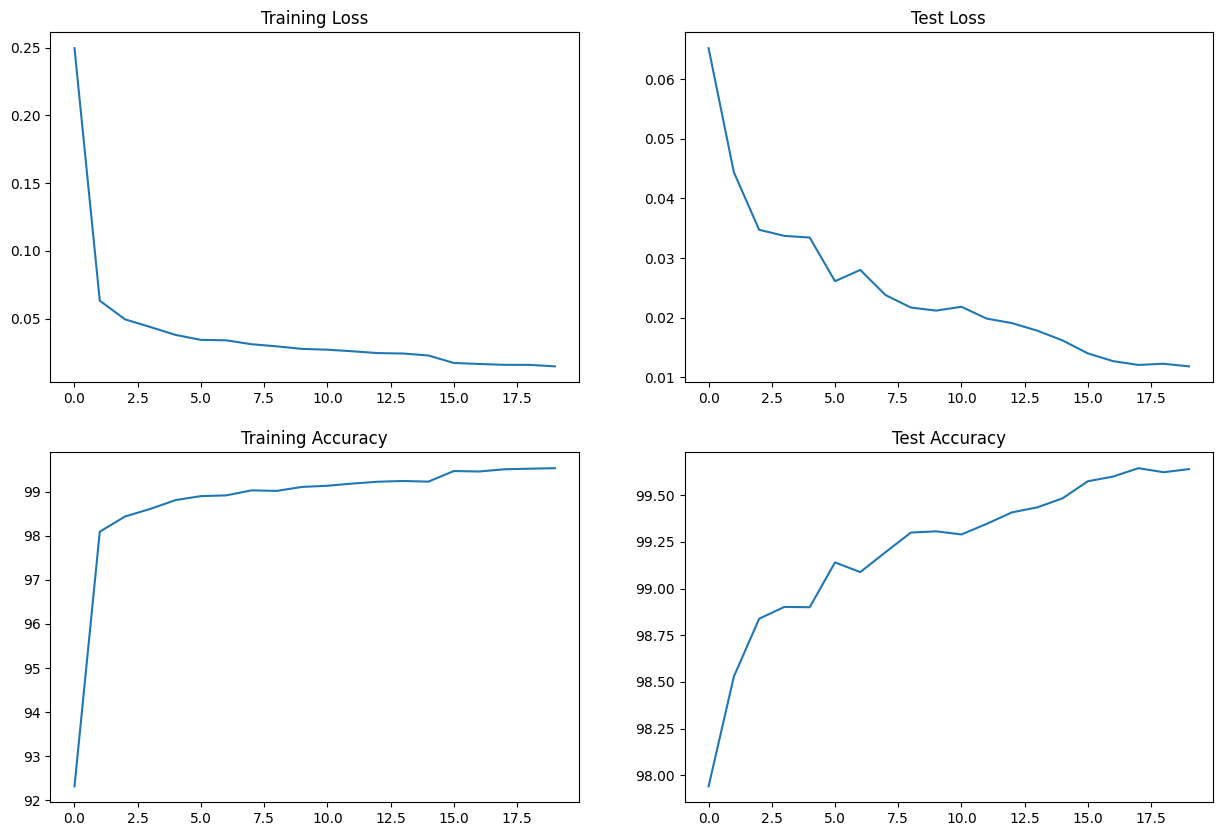

In [11]:
plot_train_test_stats(model, train_losses, train_acc, test_acc, test_losses)